### Example with 2 Layers and diffrent activation functions
This example is used to verfiy that all layer methods of NNlayer work as intended by confirming the results of a NN with 1 sample and 1 target.
Here two layers are combined where the first has the relu activation function and the seconde has no activation function. 
Usually the NNlayer class initializes the weights via a random distribution, The weight values in the arrays of the layers will be overwriten in oder to verfiy the correct implementation by comparing it with a simple example calculatable by hand

In [1]:
from layer import NNlayer
import numpy as np
#input and target/truth data
input = [2.0, -1.0]
target = [1.0, 0.5]

# Definition of ReLu and identity activation function
def relu(x):
    return np.maximum(0, x)
def reludiv(x):
    return np.where(x>0,1,0)
def identitiy(x):
    return x
def ret1(x):
    return [1,1]
# the two layers of the NN with explicite "easy" values for manual calculation
#HINT: the value of layer1.weigth_Array[0,1] after backward step should be 0.65
layer1=NNlayer(2,2,relu,reludiv,learningrate=0.1)
layer1.weigth_Array[0,0]=1.0
layer1.weigth_Array[0,1]=0.5
layer1.weigth_Array[1,0]=-0.5
layer1.weigth_Array[1,1]=-1.0
layer1.bias[0]=0.5
layer1.bias[1]=-0.5
layer2=NNlayer(2,2,identitiy,ret1,learningrate=0.1)
layer2.weigth_Array[0,0]=0.5
layer2.weigth_Array[0,1]=-0.5
layer2.weigth_Array[1,0]=-1.0
layer2.weigth_Array[1,1]=1.0
layer2.bias[0]=-1.0
layer2.bias[1]=0.5

#Calculation and printing of interrims results
print(f'input',input)
helper=layer1.forward(input)
print(f'after first layer',helper)
output=layer2.forward(helper)
print(f'output',output)
print('---Backward----')
lossderiverative=output-target
print(f'lossderi',lossderiverative)
helper= layer2.backward(lossderiverative)
print(f'array of layer 2',layer2.weigth_Array)
print(f'bias2',layer2.bias)
helper= layer1.backward(helper)
print(f'array of layer 1',layer1.weigth_Array)
print(f'bias1',layer1.bias)

print("EXAMPLE finished.\n Please verfiy")

input [2.0, -1.0]
after first layer [2. 0.]
output [ 0.  -1.5]
---Backward----
lossderi [-1. -2.]
array of layer 2 [[ 0.7 -0.5]
 [-0.6  1. ]]
bias2 [-0.7  0.8]
array of layer 1 [[ 0.7   0.65]
 [-0.5  -1.  ]]
bias1 [ 0.35 -0.65]
EXAMPLE finished.
 Please verfiy


In a first step the Data needs to be preprocessed and loaded for the first part, a csv file containing 28x28 pixel pictures is taken- the classical MNIST file for numbers.
The Dataloader class allows to get access on these pictures and provides a Dictionary containing tuples of (data, lable). Where the data is given as a vector and the also the lable is a one hot encoded version.
In addition Dataloader can shuffel the data allowing for diffrent orders of samples


Original Train Data Sample:


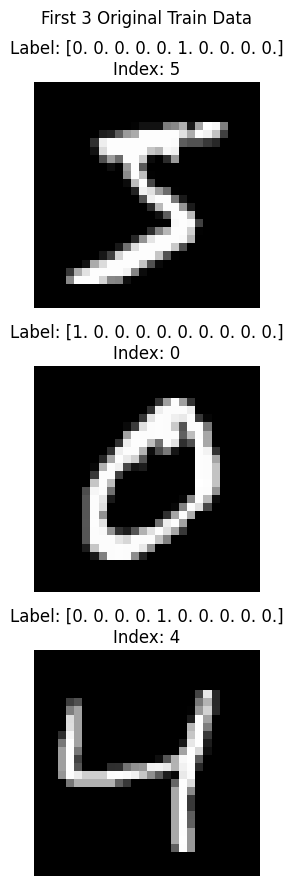

Shuffled Train Data Sample:


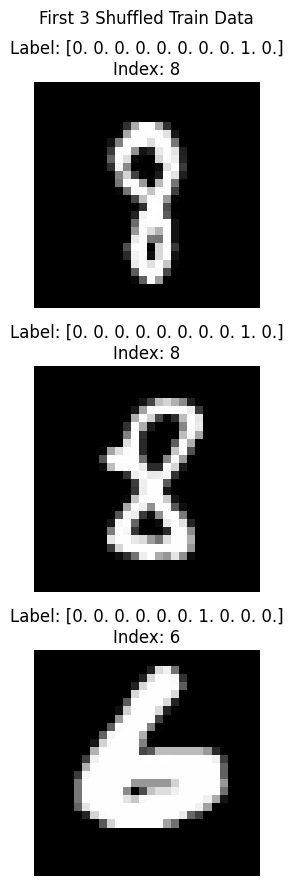

In [1]:
from Dataloader import Dataloader_from_CSV


folder_path = 'MNIST'
train_csv_path = f'{folder_path}/mnist_train.csv'
valid_csv_path = f'{folder_path}/mnist_test.csv'
dataloader = Dataloader_from_CSV(train_csv_path, valid_csv_path)

train_data = dataloader.get_train_data()
valid_data = dataloader.get_validate_data()
print("Original Train Data Sample:")
dataloader.plot_samples(train_data, 'First 3 Original Train Data')
shuffled_train_images = dataloader.shuffle_data(train_data)
print("Shuffled Train Data Sample:")
dataloader.plot_samples(shuffled_train_images, 'First 3 Shuffled Train Data')


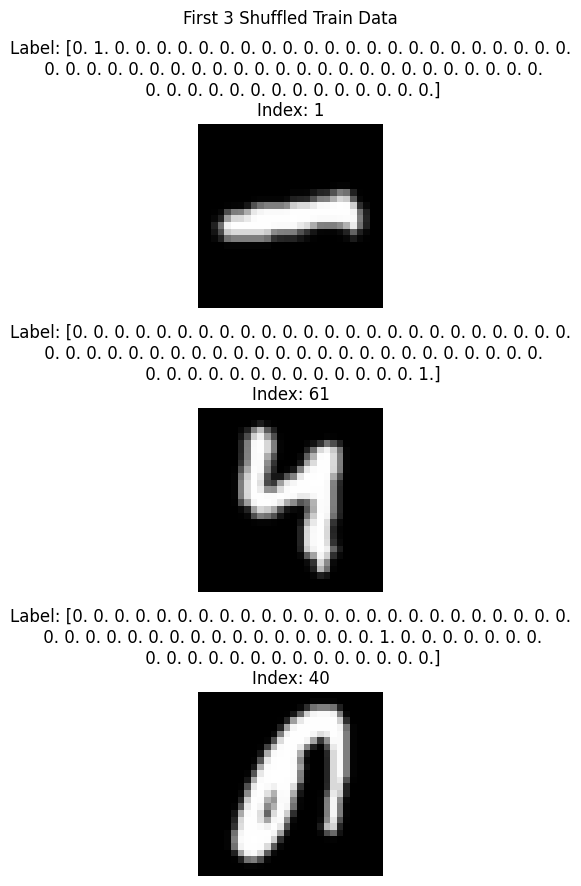

In [1]:
from Dataloader import EMNISTLoader
import matplotlib.pyplot as plt
import numpy as np

def load_mapping_from_file(filename):
    """
    Loads a mapping from a file where each line contains a number and its corresponding ASCII value.

    Parameters:
    - filename: The name of the file containing the mappings.

    Returns:
    - A dictionary mapping numbers to their corresponding ASCII values.
    """
    mapping = {}
    with open(filename, 'r') as file:
        for line in file:
            number, ascii_value = map(int, line.split())
            mapping[number] = ascii_value
    return mapping

def number_to_ascii_from_file(number, filename):
    """
    Converts a number into an ASCII character based on a provided mapping from a file.

    Parameters:
    - number: The input number to be converted.
    - filename: The name of the file containing the mappings.

    Returns:
    - The corresponding ASCII character, or None if the number is not in the mapping.
    """
    mapping = load_mapping_from_file(filename)
    if number in mapping:
        return chr(mapping[number])
    else:
        return None  # Return None if the number is not in the mapping


path_to_mapping='EMNIST/gzip/emnist-byclass-mapping.txt'
loader = EMNISTLoader('EMNIST/gzip/')
train_EMNIST_data, test_EMNIST_data = loader.load_data()
shuffled_train_EMNIST_data = loader.shuffle_data(train_EMNIST_data)
loader.plot_samples(shuffled_train_EMNIST_data, 'First 3 Shuffled Train Data')

In the next step, different activation functions and their derivatives are defined to offer a variety to choose from:
    
- **Sigmoid**: Problems are gradient saturation and non-negative activation, BUT no exploding gradient.
- **Softmax**: Converts activation sum to a probability and cannot have overflow by subtracting the max input value.
- **Tanh**: Like Sigmoid but can have negative activation.
- **ReLU**: Only positive inputs, but has nice gradients. However, exploding gradients happen more easily.
- **Leaky ReLU**: Nice gradient and takes negative inputs into account, though gradients can still explode.


In [3]:
import numpy as np
def softmax(input):
    exp_values = np.exp(input - np.max(input))  
    probabilities = exp_values / np.sum(exp_values)
    return probabilities
def softmax_derivative(input):
    helper= len(input)
    result=np.zeros((helper,helper))
    for x in range(len(input)):
        for y in range(len(input)):
            if(x==y):
                result[x,y]=input[x]*(1-input[x])
            else:
                result[x,y]=-(input[x]*input[y])
    return result
def sigmoid(x):
    x = np.clip(x, -500, 500)  
    return np.where(
        x >= 0,
        1 / (1 + np.exp(-x)),  
        np.exp(x) / (1 + np.exp(x))  
    )

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)
def cross_entropy_loss(softmax_output,y_true ):
    loss = -np.sum( y_true*np.log(softmax_output + 1e-15))  
    return loss
def softmax_cross_entropy_derivative(softmax_output, y_true):
    return softmax_output - y_true
def relu(x):
    return np.maximum(0, x)
def relu_derivative(x):
    return np.where(x>0,1,0)
def leaky_Relu(x):
    return np.where(x>0,x,0.1*x)
def leaky_Relu_derivative(x):
    return np.where(x>0,1,0.1)
def tanh(x):
    return np.tanh(x)
def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2


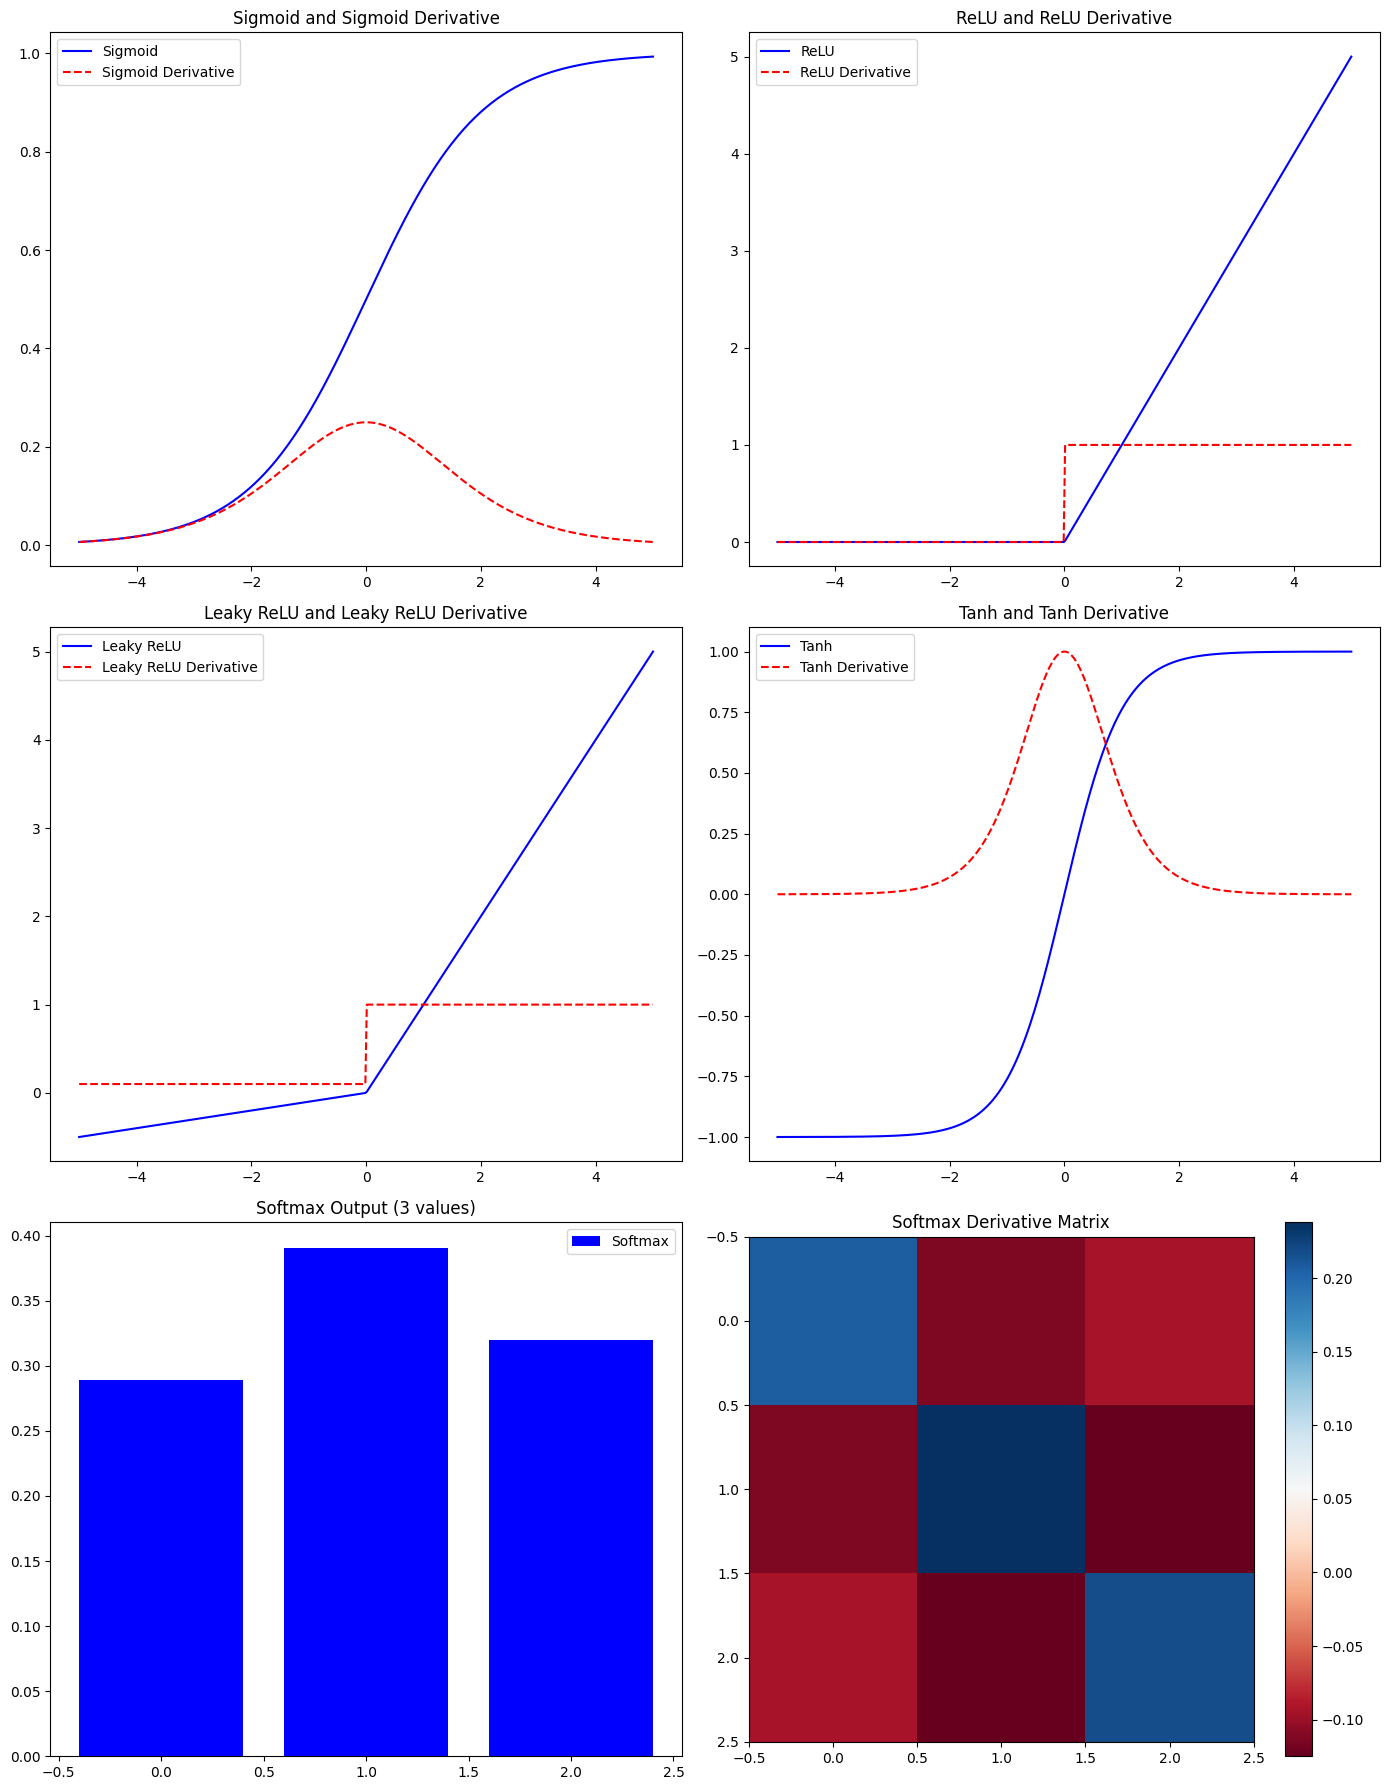

In [5]:
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 400)

# Create subplots for each function and its derivative
plt.figure(figsize=(14, 18))

# Sigmoid and its derivative
plt.subplot(3, 2, 1)
plt.plot(x, sigmoid(x), label='Sigmoid', color='blue')
plt.plot(x, sigmoid_derivative(x), label='Sigmoid Derivative', color='red', linestyle='--')
plt.title('Sigmoid and Sigmoid Derivative')
plt.legend()

# ReLU and its derivative
plt.subplot(3, 2, 2)
plt.plot(x, relu(x), label='ReLU', color='blue')
plt.plot(x, relu_derivative(x), label='ReLU Derivative', color='red', linestyle='--')
plt.title('ReLU and ReLU Derivative')
plt.legend()

# Leaky ReLU and its derivative
plt.subplot(3, 2, 3)
plt.plot(x, leaky_Relu(x), label='Leaky ReLU', color='blue')
plt.plot(x, leaky_Relu_derivative(x), label='Leaky ReLU Derivative', color='red', linestyle='--')
plt.title('Leaky ReLU and Leaky ReLU Derivative')
plt.legend()

# Tanh and its derivative
plt.subplot(3, 2, 4)
plt.plot(x, tanh(x), label='Tanh', color='blue')
plt.plot(x, tanh_derivative(x), label='Tanh Derivative', color='red', linestyle='--')
plt.title('Tanh and Tanh Derivative')
plt.legend()

# Softmax and its derivative (Softmax typically used with vectors, so we'll plot with 3 values)
x_softmax = np.array([0.2, 0.5, 0.3])  # Example softmax input vector
softmax_output = softmax(x_softmax)
softmax_deriv_output = softmax_derivative(softmax_output)

plt.subplot(3, 2, 5)
plt.bar(range(len(softmax_output)), softmax_output, label='Softmax', color='blue')
plt.title('Softmax Output (3 values)')
plt.legend()

plt.subplot(3, 2, 6)
plt.imshow(softmax_deriv_output, cmap='RdBu', interpolation='none')
plt.colorbar()
plt.title('Softmax Derivative Matrix')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

The first network:    
- Using Sigmoid: and trained on MNIST data with 10 classes (only numerals)
- This network: contains just basic features and an exponential decaying learning rate
- Loss function: Simple Mean Square Error (MSE)
- **CAUTION**: This is not a good neural network as the total accuracy is 10%, meaning it is randomly guessing
- In this context, accuracy means the ratio at which the network predicted the correct class in relation to the entire validation dataset, called valid data.
- The loss plotted in the graphs is always the total loss over all training sets and classes in one epoch. To get the average for one output channel: divide the total loss by #classes * # training sets



Epoch 1, Loss: 164.03782248428433
Epoch 2, Loss: 167.4463668692813
Epoch 3, Loss: 227.33901843205734
Epoch 4, Loss: 154.91379387073633
Epoch 5, Loss: 99.99999788163335
Epoch 6, Loss: 99.9999978322766
Epoch 7, Loss: 99.99999778024056
Epoch 8, Loss: 99.99999772529738
Epoch 9, Loss: 99.99999766719344
Epoch 10, Loss: 99.99999760564435
Epoch 11, Loss: 99.9999975403301
Epoch 12, Loss: 99.99999747089012
Epoch 13, Loss: 99.99999739691607
Epoch 14, Loss: 99.999997317944
Epoch 15, Loss: 99.9999972334439
Epoch 16, Loss: 99.99999714280834
Epoch 17, Loss: 99.99999704533724
Epoch 18, Loss: 99.99999694022034
Epoch 19, Loss: 99.99999682651111
Epoch 20, Loss: 99.99999670310336
Epoch 21, Loss: 99.99999656869032
Epoch 22, Loss: 99.99999642172018
Epoch 23, Loss: 99.99999626033409
Epoch 24, Loss: 99.99999608228634
Epoch 25, Loss: 99.9999958848396
Epoch 26, Loss: 99.99999566462085
Epoch 27, Loss: 99.9999954174261
Epoch 28, Loss: 99.99999513794731
Epoch 29, Loss: 99.99999481938521
Epoch 30, Loss: 99.99999445

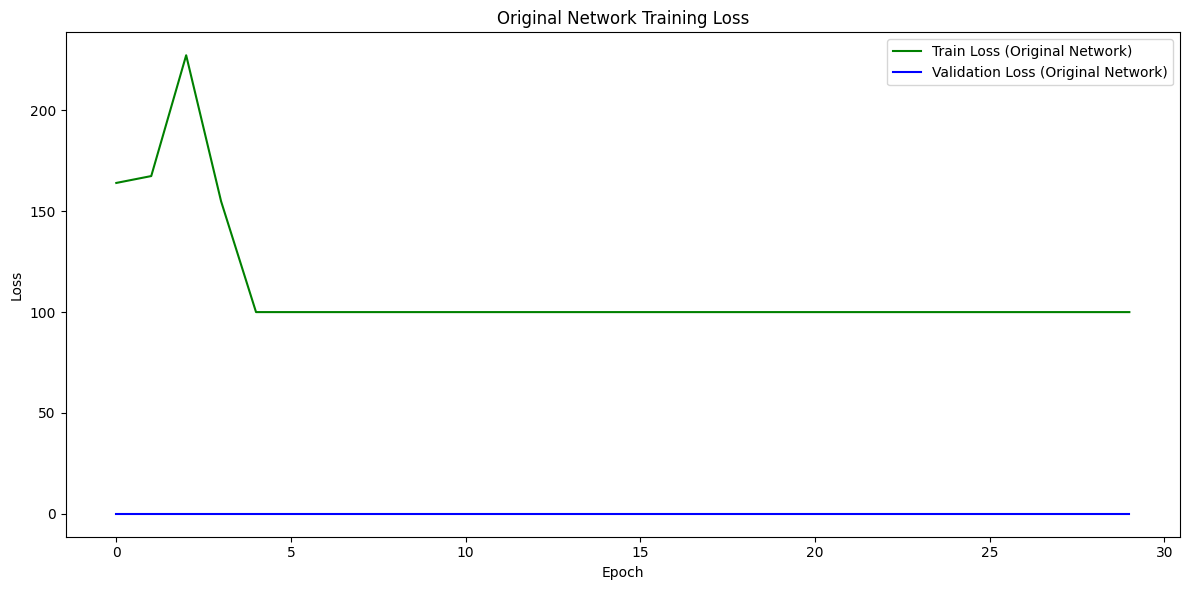

accuracy on 10000 samples:0.1028


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from Networks import NeuronalNetwork


image_dim_flat=28*28
layers_number = [784,784]
initial_input_dim=image_dim_flat
final_output_dim=10
emnist_network=NeuronalNetwork(initial_input=initial_input_dim,
    final_output=final_output_dim,
    layers_number=layers_number,
    activation_function=sigmoid,#leaky_ReLu,
    function_derivative=sigmoid_derivative,#leaky_ReLu_deriverative,
    learning_rate=0.035
    
)

first_10_data = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[:1000]}
first_10_vdata = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[-1:-101]}

emnist_network.train(first_10_data,first_10_vdata,epochs=30)


plt.figure(figsize=(12, 6))
x1 = range(len(emnist_network.total_loss))

plt.plot(x1, emnist_network.total_loss, label='Train Loss (Original Network)', color='green')
plt.plot(x1, emnist_network.validate_loss, label='Validation Loss (Original Network)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Original Network Training Loss')
plt.legend()



plt.tight_layout()
plt.show()
emnist_network.evaluate_network_accuracy(valid_data)

- In a next step the Network will wrap the last output in softmax in order to present properbilities and make the backpropergation smoother.
- Loss function : Multiclass Cross entropy (MCE)
- MCE is better than square error because the gradient is not based on x^2 but on logarithm
-   This network  can finaly be called a network as the expected accuracy is between 70-80%

Epoch 1, Loss: 2267.7452781393135


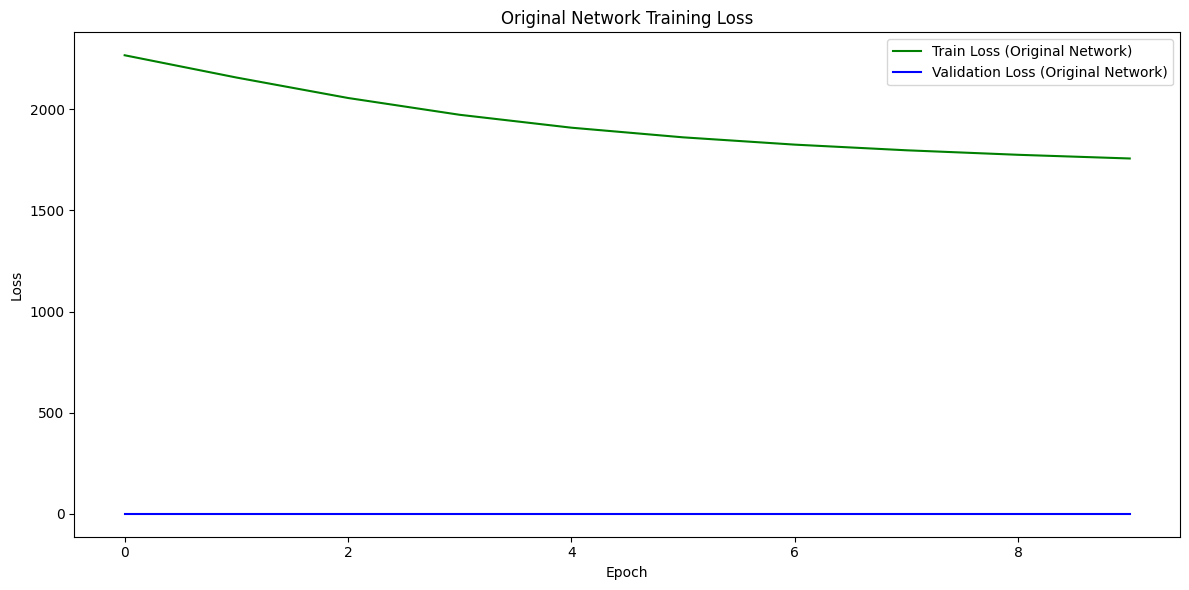

accuracy on 10000 samples:0.7882


In [10]:
from Networks import NeuronalNetwork_and_softmax as NNS
import matplotlib.pyplot as plt
image_dim_flat=28*28
layers_number = [512]
initial_input_dim=image_dim_flat
final_output_dim=10

network_Soft=NNS(initial_input=initial_input_dim,
    final_output=final_output_dim,
    layers_number=layers_number,
    activation_function=sigmoid,#leaky_ReLu,
    function_derivative=sigmoid_derivative,#leaky_ReLu_deriverative,
    learning_rate=0.01
    
)
first_10_data = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[:1000]}
first_10_vdata = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[-1:-100]}
#network_Soft.train(shuffled_train_images,valid_data,epochs=10)
network_Soft.train(first_10_data,first_10_vdata,epochs=10)
plt.figure(figsize=(12, 6))
x = range(len(network_Soft.total_loss))

plt.plot(x, network_Soft.total_loss, label='Train Loss (Original Network)', color='green')
plt.plot(x, network_Soft.validate_loss, label='Validation Loss (Original Network)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Original Network Training Loss')
plt.legend()

plt.tight_layout()
plt.show()
network_Soft.evaluate_network_accuracy(valid_data)

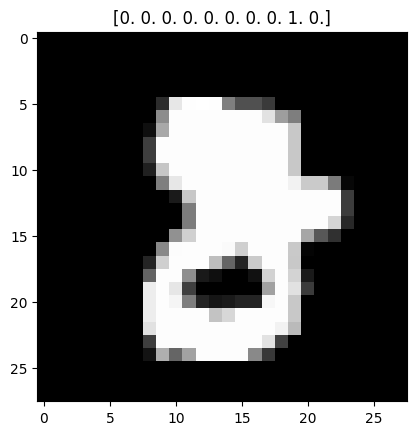

prediction: [0.08522408 0.07649557 0.08471184 0.15572722 0.07546855 0.08828309
 0.07847572 0.07890321 0.19507705 0.08163368] 
 and max index 8 
accuracy on 10000 samples:0.7882


In [12]:
image,lable=shuffled_train_images.get(55555)
plt.imshow(image.reshape(28,28),cmap='gray')
plt.title(lable)
plt.show()
prediction=network_Soft.querry(image)
print(f'prediction: {prediction} \n and max index {np.argmax(prediction)} ')
network_Soft.evaluate_network_accuracy(valid_data)

The next version of Neuranal networks contains no change in code but the numbers of layers and switching from sigmoid to leaky_Relu

Epoch 1, Loss: 955.3358248791909


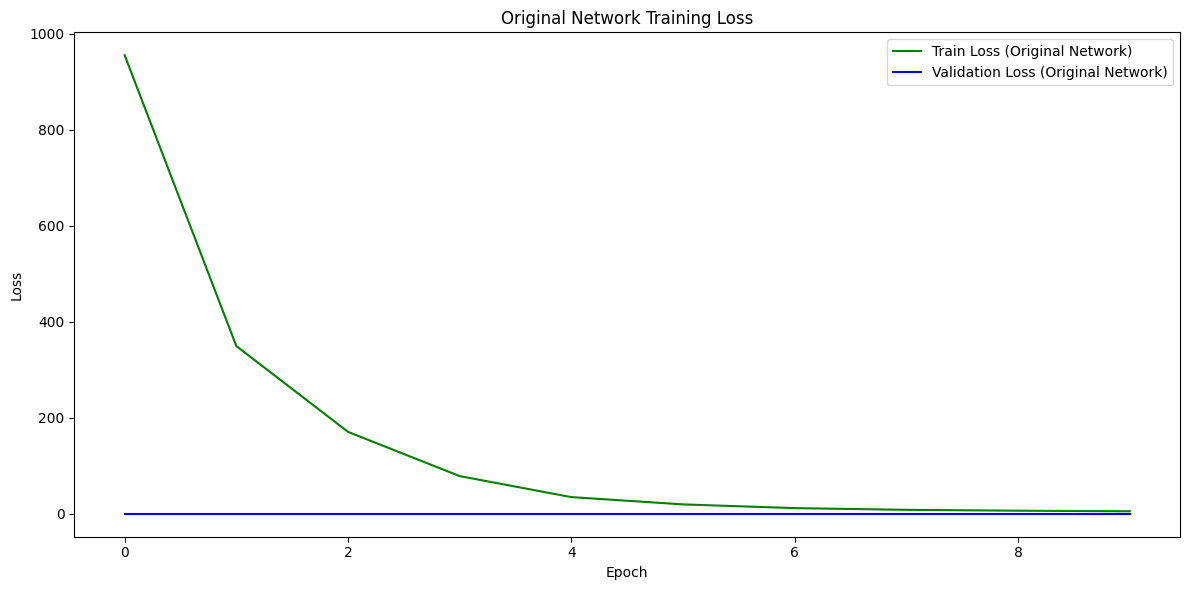

accuracy on 10000 samples:0.897


In [13]:
from Networks import NeuronalNetwork_and_softmax as NNS
import matplotlib.pyplot as plt
image_dim_flat=28*28
layers_number = [512,265]
initial_input_dim=image_dim_flat
final_output_dim=10

network_Soft2=NNS(initial_input=initial_input_dim,
    final_output=final_output_dim,
    layers_number=layers_number,
    activation_function=leaky_Relu,
    function_derivative=leaky_Relu_derivative,
    learning_rate=0.01
    
)
first_10_data = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[:1000]}
first_10_vdata = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[-1:-100]}
#comment the following line in and the line after that out to train on the whole data set
#network_Soft2.train(shuffled_train_images,valid_data,epochs=10)
network_Soft2.train(first_10_data,first_10_vdata,epochs=10)
plt.figure(figsize=(12, 6))
x = range(len(network_Soft2.total_loss))

plt.plot(x, network_Soft2.total_loss, label='Train Loss (Original Network)', color='green')
plt.plot(x, network_Soft2.validate_loss, label='Validation Loss (Original Network)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Original Network Training Loss')
plt.legend()

plt.tight_layout()
plt.show()
network_Soft2.evaluate_network_accuracy(valid_data)

In the next iteration L2 regularization was added and dropout. Both are used to make the training more "difficult" and reduce the risk of overfitting.
- **L2 reg** : keeps the individual weights of the layers as small a possible
- **Caution** : since L2 adds the quadrat of all weigths to the total loss  the total loss is not a good measure to of how well training progresses, therefore a second loss value is printed without the L2 regularisation
- **Dropout** : after a number of training images is forwarded and backwarded (here subset =100) a new mask is generated to switch off certain nodes in the network. Dropout is used to train on diffrent features making it possible that the network does not limit itself on 1 feature for one class. It also improves accuracy of the network by training several "subnetworks" (here in each epoch 1000 training set/ 100 subset =10)
- in this configuraten an accuracy over 80% can be expected . 

Epoch 1, Loss: 3443.1888698667613, Loss without reg: 1851.9864952873563
Epoch 2, Loss: 2646.4316319932814, Loss without reg: 854.8628050904089
Epoch 3, Loss: 2535.974626394948, Loss without reg: 578.9541074760765
Epoch 4, Loss: 2550.081501341308, Loss without reg: 474.10238582468537
Epoch 5, Loss: 2562.3404831128523, Loss without reg: 389.44561373510913
Epoch 6, Loss: 2594.2739358803774, Loss without reg: 333.1414410864726
Epoch 7, Loss: 2617.352393069662, Loss without reg: 278.42625853824063
Epoch 8, Loss: 2660.0961300878394, Loss without reg: 253.6744998430416
Epoch 9, Loss: 2666.548051258826, Loss without reg: 200.12522679965957
Epoch 10, Loss: 2710.4372912297654, Loss without reg: 186.87135132527814


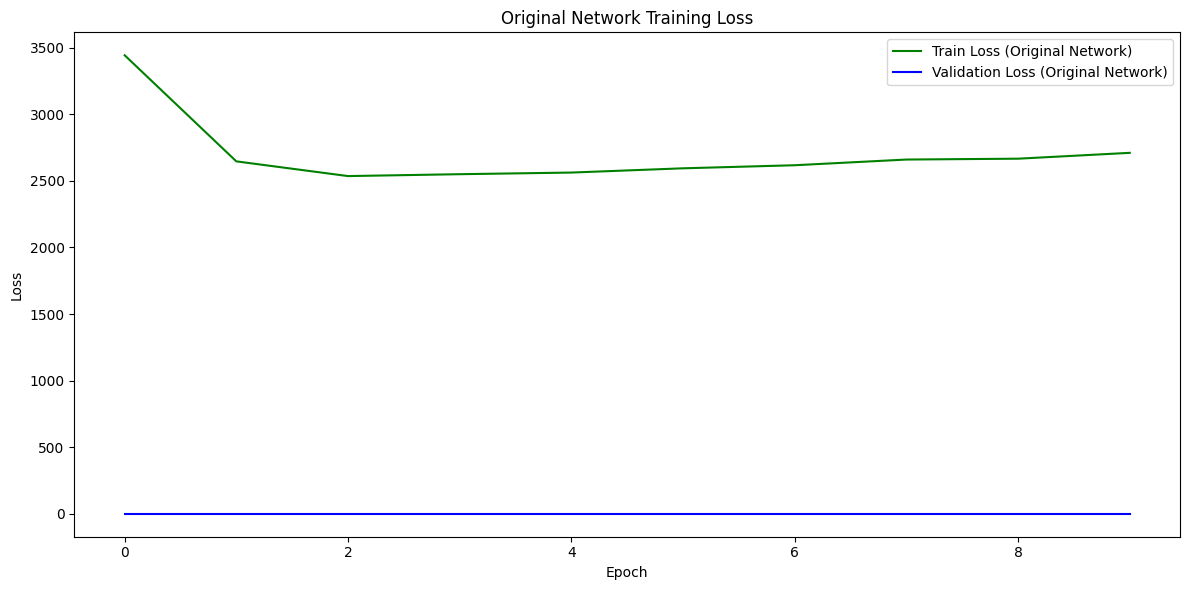

accuracy on 10000 samples:0.8535


In [14]:
from Networks import NeuronalNetwork_softmax_dropout as NND
import matplotlib.pyplot as plt
image_dim_flat=28*28
layers_number = [512,256]
initial_input_dim=image_dim_flat
final_output_dim=10

network_dropout=NND(initial_input=initial_input_dim,
    final_output=final_output_dim,
    layers_number=layers_number,
    activation_function=leaky_Relu,
    function_derivative=leaky_Relu_derivative,
    learning_rate=0.01,
    decay_rate=0.03,
    L2_reg=True,
    lambda_reg=0.001,
    properbility=0.75,
    subset=100

    
    
)
first_10_data = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[:1000]}
first_10_vdata = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[-1:-100]}
#network_Soft2.train(shuffled_train_images,valid_data,epochs=10)
network_dropout.train(first_10_data,first_10_vdata,epochs=10)
plt.figure(figsize=(12, 6))
x = range(len(network_dropout.total_loss))

plt.plot(x,network_dropout.total_loss, label='Train Loss (Original Network)', color='green')
plt.plot(x, network_dropout.validate_loss, label='Validation Loss (Original Network)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Original Network Training Loss')
plt.legend()

plt.tight_layout()
plt.show()
network_dropout.evaluate_network_accuracy(valid_data)


The next iteration changes just the number of layers and nodes

Epoch 1, Loss: 2264.257402873368, Loss without reg: 1942.0847147998184
Epoch 2, Loss: 1285.5482432226281, Loss without reg: 885.8785218076781
Epoch 3, Loss: 1135.516028152317, Loss without reg: 641.6497624758885
Epoch 4, Loss: 1069.2111229818197, Loss without reg: 476.45881675180914
Epoch 5, Loss: 1060.2521348974658, Loss without reg: 374.3088128335419
Epoch 6, Loss: 1070.4384838859464, Loss without reg: 299.2114927332163
Epoch 7, Loss: 1119.1707547345059, Loss without reg: 263.7818102366031
Epoch 8, Loss: 1130.9692071962559, Loss without reg: 193.34229128797764
Epoch 9, Loss: 1229.940918627812, Loss without reg: 209.36626578659354
Epoch 10, Loss: 1304.7567630103542, Loss without reg: 192.94219679503917


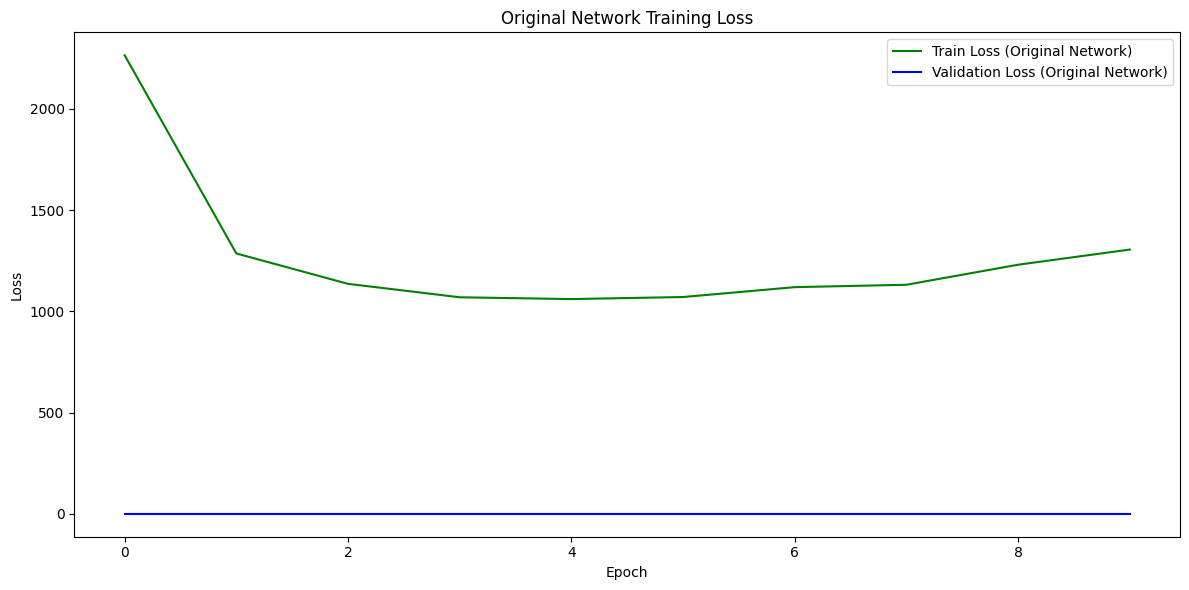

accuracy on 10000 samples:0.8535


In [15]:
from Networks import NeuronalNetwork_softmax_dropout as NND
import matplotlib.pyplot as plt
image_dim_flat=28*28
layers_number = [784,512,256]
initial_input_dim=image_dim_flat
final_output_dim=10

network_dropout_2=NND(initial_input=initial_input_dim,
    final_output=final_output_dim,
    layers_number=layers_number,
    activation_function=leaky_Relu,
    function_derivative=leaky_Relu_derivative,
    learning_rate=0.01,
    decay_rate=0.03,
    L2_reg=True,#False,
    lambda_reg=0.0001,#0,
    properbility=0.75,
    subset=4096

    
    
)
first_10_data = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[:1000]}
first_10_vdata = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[-1:-100]}
#network_dropout_2.train(shuffled_train_images,valid_data,epochs=25)
network_dropout_2.train(first_10_data,first_10_vdata,epochs=10)
plt.figure(figsize=(12, 6))
x = range(len(network_dropout_2.total_loss))

plt.plot(x,network_dropout_2.total_loss, label='Train Loss (Original Network)', color='green')
plt.plot(x, network_dropout_2.validate_loss, label='Validation Loss (Original Network)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Original Network Training Loss')
plt.legend()

plt.tight_layout()
plt.show()
network_dropout.evaluate_network_accuracy(valid_data)

Epoch 1, Loss: 1643.6712662824634, Loss without reg: 1483.0450414531265
Epoch 2, Loss: 847.1088118930905, Loss without reg: 681.164036908486
Epoch 3, Loss: 666.5322072022086, Loss without reg: 496.53988678063257
Epoch 4, Loss: 572.3137859688645, Loss without reg: 399.21914555004776
Epoch 5, Loss: 520.2022387588277, Loss without reg: 344.466555596994
Epoch 6, Loss: 478.6789156463206, Loss without reg: 300.65591927583415
Epoch 7, Loss: 441.17971626571733, Loss without reg: 261.06025169046706
Epoch 8, Loss: 412.5744023357817, Loss without reg: 230.49349215202554
Epoch 9, Loss: 395.773215677238, Loss without reg: 211.81778628617755
Epoch 10, Loss: 367.84168528788416, Loss without reg: 182.11774747998103


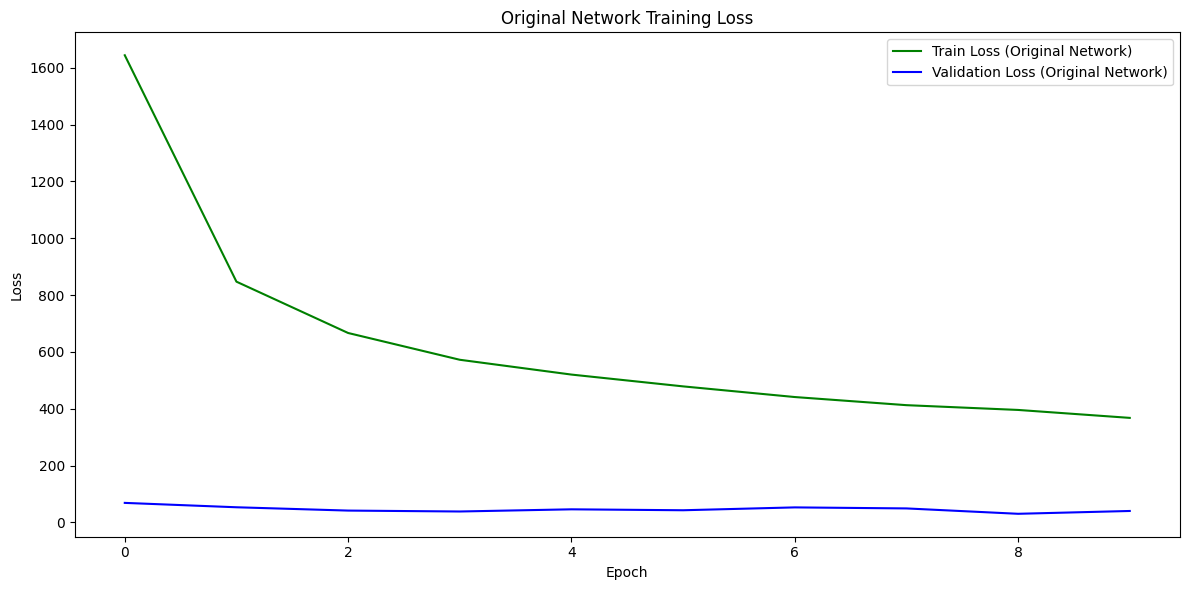

accuracy on 10000 samples:0.8691


In [16]:
from Networks import NeuronalNetwork_softmax_dropout as NND
import matplotlib.pyplot as plt
image_dim_flat=28*28
layers_number = [784]
initial_input_dim=image_dim_flat
final_output_dim=10

network_Soft=NND(initial_input=initial_input_dim,
    final_output=final_output_dim,
    layers_number=layers_number,
    activation_function=leaky_Relu,
    function_derivative=leaky_Relu_derivative,
    learning_rate=0.01,
    decay_rate=0.03,
    L2_reg=True,#False,
    lambda_reg=0.0001,#0,
    properbility=0.75,
    subset=128

    
)
first_10_data = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[:1000]}
first_10_vdata = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[5000:5100]}
#network_Soft.train(shuffled_train_images,valid_data,epochs=101)
network_Soft.train(first_10_data,first_10_vdata,epochs=10)
plt.figure(figsize=(12, 6))
x = range(len(network_Soft.total_loss))

plt.plot(x, network_Soft.total_loss, label='Train Loss (Original Network)', color='green')
plt.plot(x, network_Soft.validate_loss, label='Validation Loss (Original Network)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Original Network Training Loss')
plt.legend()

plt.tight_layout()
plt.show()
network_Soft.evaluate_network_accuracy(valid_data)

This step implements a new feature: instead of simple SGD, it uses the ADAM rule for backpropagation. 

For geeks, Adaptive Moment Estimation (ADAM) utilizes first and second order momentum for its gradient descent, converging faster than regular SGD. 

The `network_adam` uses ADAM and the compare network regular SGD, as used in all previous networks in this notebook. 

**CAUTION**: Since both networks are independently initialized, a non-negligible effect can be observed at the beginning.


Epoch 1, Loss: 3840.347521733062, Loss without reg: 1922.6712550885786
Epoch 2, Loss: 3817.422894277446, Loss without reg: 807.3353147785314
Epoch 3, Loss: 3986.89960144745, Loss without reg: 520.2030618070646
Epoch 4, Loss: 4235.313425295876, Loss without reg: 425.53532601132105
Epoch 5, Loss: 4396.900949250467, Loss without reg: 266.8752419139666
Epoch 6, Loss: 4801.258341454992, Loss without reg: 311.097924110602
Epoch 7, Loss: 4924.474554370553, Loss without reg: 199.9875007637151
Epoch 8, Loss: 5236.992071800994, Loss without reg: 273.1501820525117
Epoch 9, Loss: 5520.071911893684, Loss without reg: 196.94414888696352
Epoch 10, Loss: 5679.623476151827, Loss without reg: 174.51900914978808
Epoch 1, Loss: 3940.8989986157194, Loss without reg: 2017.4134844838916
Epoch 2, Loss: 4452.262279120037, Loss without reg: 1309.390328977161
Epoch 3, Loss: 4520.119553264794, Loss without reg: 804.2215790808632
Epoch 4, Loss: 4648.631714398094, Loss without reg: 635.0510695239292
Epoch 5, Loss: 

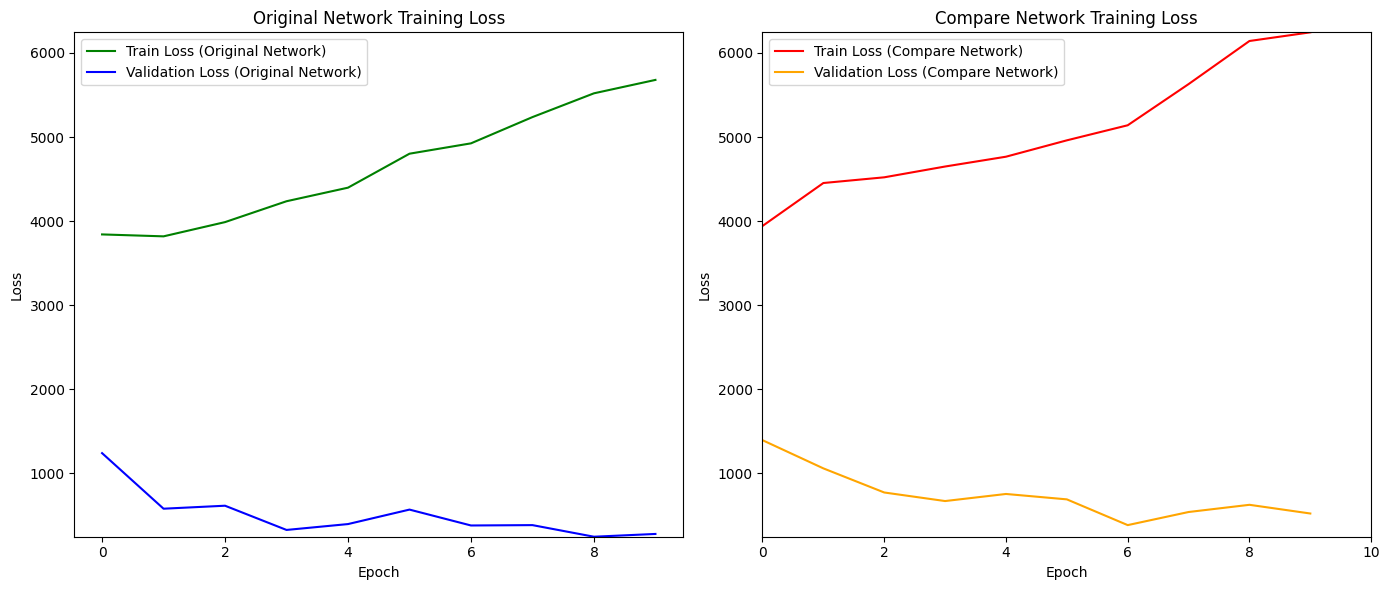

Compare network:
accuracy on 10000 samples:0.8568
Adam network:
accuracy on 10000 samples:0.878


In [17]:
from Networks import NeuronalNetwork_Adam_softmax_dropout as NND
import matplotlib.pyplot as plt
image_dim_flat=28*28
layers_number = [784,512,256]
initial_input_dim=image_dim_flat
final_output_dim=10

network_adam=NND(initial_input=initial_input_dim,
    final_output=final_output_dim,
    layers_number=layers_number,
    activation_function=leaky_Relu,
    function_derivative=leaky_Relu_derivative,
    learning_rate=0.01,
    decay_rate=0.03,
    L2_reg=True,#False,
    lambda_reg=0.0001,#0,
    properbility=0.75,
    subset=128,
    use_adam=True

    
)

compare=NND(initial_input=initial_input_dim,
    final_output=final_output_dim,
    layers_number=layers_number,
    activation_function=leaky_Relu,
    function_derivative=leaky_Relu_derivative,
    learning_rate=0.01,
    decay_rate=0.03,
    L2_reg=True,#False,
    lambda_reg=0.0001,#0,
    properbility=0.75,
    subset=128,
    use_adam=False

    
)
first_10_data = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[:1000]}
first_10_vdata = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[5000:5100]}
#network_adamt3.train(shuffled_train_images,valid_data,epochs=75)
network_adam.train(first_10_data,first_10_vdata,epochs=10)
compare.train(first_10_data,first_10_vdata,epochs=10)
# Create figure and subplots
plt.figure(figsize=(14, 6))

# Get the minimum and maximum values for x and y axes
x = range(len(network_adam.total_loss))
x_compare = range(len(compare.total_loss))

y_min = min(min(network_adam.total_loss), min(network_adam.validate_loss) 
,min(compare.total_loss), min(compare.validate_loss))

y_max = max(max(network_adam.total_loss), max(network_adam.validate_loss), 
            max(compare.total_loss), max(compare.validate_loss))

# Plot Original Network
plt.subplot(1, 2, 1)
plt.plot(x, network_adam.total_loss, label='Train Loss (Original Network)', color='green')
plt.plot(x, network_adam.validate_loss, label='Validation Loss (Original Network)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Original Network Training Loss')
plt.legend()
plt.ylim([y_min, y_max])  # Set the same y-limits
#plt.xlim([0, max(len(x), len(x_compare))])  # Set the same x-limits

# Plot Comparison Network
plt.subplot(1, 2, 2)
plt.plot(x_compare, compare.total_loss, label='Train Loss (Compare Network)', color='red')
plt.plot(x_compare, compare.validate_loss, label='Validation Loss (Compare Network)', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Compare Network Training Loss')
plt.legend()
plt.ylim([y_min, y_max])  # Set the same y-limits
plt.xlim([0, max(len(x), len(x_compare))])  # Set the same x-limits

plt.tight_layout()
plt.show()
print('Compare network:')
compare.evaluate_network_accuracy(valid_data)
print('Adam network:')
network_adam.evaluate_network_accuracy(valid_data)

Finally switch from MNIST to EMNIST:
- more classes : 62 classes: 26 letters in BIG and small + 10 numerals 

Epoch 1, Loss: 3750.489929013134, Loss without reg: 3750.489929013134
Epoch 2, Loss: 3138.642406397937, Loss without reg: 3138.642406397937
Epoch 3, Loss: 3112.8184090368336, Loss without reg: 3112.8184090368336
Epoch 4, Loss: 2954.673002403803, Loss without reg: 2954.673002403803
Epoch 5, Loss: 2534.1112985760537, Loss without reg: 2534.1112985760537
Epoch 6, Loss: 2690.0588734351195, Loss without reg: 2690.0588734351195
Epoch 7, Loss: 2623.1198606294497, Loss without reg: 2623.1198606294497
Epoch 8, Loss: 2445.4360211573576, Loss without reg: 2445.4360211573576
Epoch 9, Loss: 2764.7076627191427, Loss without reg: 2764.7076627191427
Epoch 10, Loss: 2484.3975281788153, Loss without reg: 2484.3975281788153
Epoch 11, Loss: 2180.0988002569857, Loss without reg: 2180.0988002569857
Epoch 12, Loss: 2490.804290131386, Loss without reg: 2490.804290131386
Epoch 13, Loss: 2527.3374710857806, Loss without reg: 2527.3374710857806
Epoch 14, Loss: 2733.6865903570424, Loss without reg: 2733.686590357

<Figure size 1200x600 with 0 Axes>

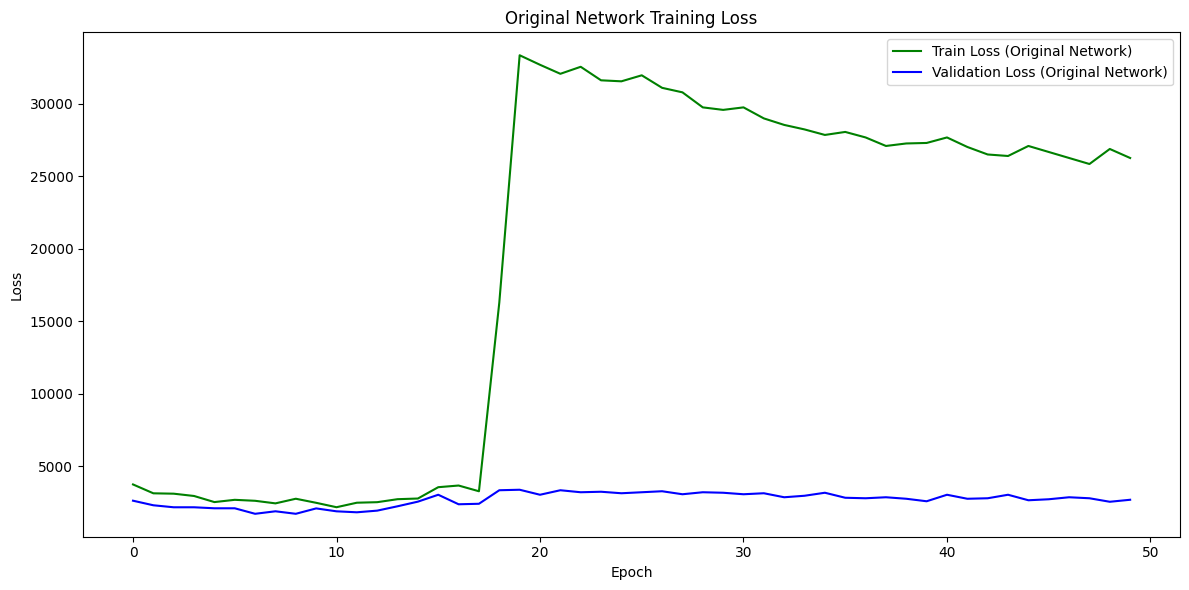

accuracy on 116323 samples:0.3247938928672747


In [11]:
from Networks import NeuronalNetwork_softmax_dropout as NNSD
import matplotlib.pyplot as plt
import numpy as np
image_dim_flat=28*28
layers_number = [784,784,512,512]
initial_input_dim=image_dim_flat
final_output_dim=62

network_Softmax_EMNIST=NNSD(initial_input=initial_input_dim,
    final_output=final_output_dim,
    layers_number=layers_number,
    activation_function=leaky_Relu,
    function_derivative=leaky_Relu_derivative,
    learning_rate=0.001,
    decay_rate=0.0001,
    L2_reg=False,
    lambda_reg=0.0001,#0,
    properbility=0.75,
    subset=100,
    )

#first_10_data = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[:100]}
#first_10_vdata = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[5000:5100]}
first_10_data = {key: train_EMNIST_data[key] for key in list(train_EMNIST_data.keys())[:1000]}
first_10_vdata = {key: train_EMNIST_data[key] for key in list(train_EMNIST_data.keys())[5000:5100]}
#network_Soft3.train(shuffled_train_images,valid_data,epochs=20)
network_Softmax_EMNIST.train(first_10_data,first_10_vdata,epochs=50)
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
x = range(len(network_Softmax_EMNIST.total_loss))

plt.plot(x, network_Softmax_EMNIST.total_loss, label='Train Loss (Original Network)', color='green')
plt.plot(x, network_Softmax_EMNIST.validate_loss, label='Validation Loss (Original Network)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Original Network Training Loss')
plt.legend()

plt.tight_layout()
plt.show()
#network_Soft3.visualize_weights()
network_Softmax_EMNIST.evaluate_network_accuracy(test_EMNIST_data)


In [12]:
from Networks import NeuronalNetwork_Adam_softmax_dropout as NND
import matplotlib.pyplot as plt
import numpy as np
image_dim_flat=28*28
layers_number = [784,784,512,512]
initial_input_dim=image_dim_flat
final_output_dim=62

network_Soft3=NND(initial_input=initial_input_dim,
    final_output=final_output_dim,
    layers_number=layers_number,
    activation_function=leaky_Relu,
    function_derivative=leaky_Relu_derivative,
    learning_rate=0.01,
    decay_rate=0.0001,
    L2_reg=False,
    lambda_reg=0.0001,
    properbility=0.75,
    subset=100,
    beta1=0.9,
    beta2=0.999,
    epsi=0.00000001,
    use_adam=True
    )

#first_10_data = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[:100]}
#first_10_vdata = {key: shuffled_train_images[key] for key in list(shuffled_train_images.keys())[5000:5100]}
first_10_data = {key: train_EMNIST_data[key] for key in list(train_EMNIST_data.keys())[:1000]}
first_10_vdata = {key: train_EMNIST_data[key] for key in list(train_EMNIST_data.keys())[5000:5100]}
#network_Soft3.train(shuffled_train_images,valid_data,epochs=20)
network_Soft3.train(first_10_data,first_10_vdata,epochs=50)
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
x = range(len(network_Soft3.total_loss))

plt.plot(x, network_Soft3.total_loss, label='Train Loss (Original Network)', color='green')
plt.plot(x, network_Soft3.validate_loss, label='Validation Loss (Original Network)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Original Network Training Loss')
plt.legend()

plt.tight_layout()
plt.show()
#network_Soft3.visualize_weights()
network_Soft3.evaluate_network_accuracy(test_EMNIST_data)


Epoch 1, Loss: 29562.297067952702, Loss without reg: 29562.297067952702
Epoch 2, Loss: 18592.17905548116, Loss without reg: 18592.17905548116
Epoch 3, Loss: 23382.834406638238, Loss without reg: 23382.834406638238
Epoch 4, Loss: 22218.06909884446, Loss without reg: 22218.06909884446
Epoch 5, Loss: 16361.367165274094, Loss without reg: 16361.367165274094
Epoch 6, Loss: 17540.342535738844, Loss without reg: 17540.342535738844
Epoch 7, Loss: 21537.31656858977, Loss without reg: 21537.31656858977
Epoch 8, Loss: 25256.97575042692, Loss without reg: 25256.97575042692
Epoch 9, Loss: 24829.05306334429, Loss without reg: 24829.05306334429
Epoch 10, Loss: 26040.505986956614, Loss without reg: 26040.505986956614
Epoch 11, Loss: 25368.32561374874, Loss without reg: 25368.32561374874
Epoch 12, Loss: 22427.334448491445, Loss without reg: 22427.334448491445
Epoch 13, Loss: 21724.8940013848, Loss without reg: 21724.8940013848
Epoch 14, Loss: 29161.170501306216, Loss without reg: 29161.170501306216
Epo

In [7]:
data,lable=first_10_data.get(1)
prediciton=network_Soft3.querry(data)
print(f'prediction: {prediciton}\n lable{lable}')
helpervar=np.argmax(prediciton)
helpervar=number_to_ascii_from_file(helpervar,path_to_mapping)
print(f'ascii sign : {helpervar}')

prediction: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 lable[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ascii sign : 2


In [8]:
def save_network_params(network, filename):
    with open(filename, 'w') as f:
        for i, layer in enumerate(network.layers):
            f.write(f'Layer {i} weights:\n')
            np.savetxt(f, layer.weigth_Array)
            f.write(f'Layer {i} biases:\n')
            np.savetxt(f, layer.bias)
            f.write('\n')  # Separate layers with a newline

            np.savetxt(f, layer.bias, header='biases')
